In [1]:
import os
import cv2
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

In [2]:
# File Directory for both the train and test
train_path = "../mycode/Data/train"
val_path = "../mycode/Data/valid"
test_path = "../mycode/Data/test"

In [3]:
def GetDatasetSize(path):
    num_of_image = {}
    for folder in os.listdir(path):
        # Counting the Number of Files in the Folder
        num_of_image[folder] = len(os.listdir(os.path.join(path, folder)));
    return num_of_image;
    
train_set = GetDatasetSize(train_path)
val_set = GetDatasetSize(val_path)
test_set = GetDatasetSize(test_path)
print(train_set,"\n\n",val_set,"\n\n",test_set)

{'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 195, 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 115, 'normal': 148, 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 155} 

 {'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 23, 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 21, 'normal': 13, 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 15} 

 {'adenocarcinoma': 120, 'large.cell.carcinoma': 51, 'normal': 54, 'squamous.cell.carcinoma': 90}


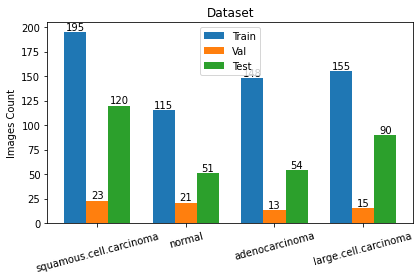

In [4]:
labels = ['squamous.cell.carcinoma', 'normal', 'adenocarcinoma', 'large.cell.carcinoma']
train_list = list(train_set.values())
val_list = list(val_set.values())
test_list = list(test_set.values())

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, train_list, width, label='Train')
rects2 = ax.bar(x, val_list, width, label='Val')
rects3 = ax.bar(x + width, test_list, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Images Count')
ax.set_title('Dataset')
ax.set_xticks(x, labels)
plt.xticks(rotation=15)
ax.legend()

ax.bar_label(rects1)
ax.bar_label(rects2)
ax.bar_label(rects3)

fig.tight_layout()

plt.show()

In [5]:
import tensorflow.keras
from tensorflow.keras import layers
from tensorflow.keras import Model 
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Dense,Conv2D, Flatten, MaxPool2D, Dropout

In [6]:
train_datagen = ImageDataGenerator(rescale = 1.0/255.0,
                                  horizontal_flip = True,
                                  fill_mode = 'nearest',
                                  zoom_range=0.2,
                                  shear_range = 0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  rotation_range=0.4)

train_data = train_datagen.flow_from_directory(train_path,
                                                   batch_size = 5,
                                                   target_size = (350,350),
                                                   class_mode = 'categorical')

Found 613 images belonging to 4 classes.


In [7]:
train_data.class_indices

{'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 0,
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 1,
 'normal': 2,
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 3}

In [8]:
val_datagen = ImageDataGenerator(rescale = 1.0/255.0)
val_data = val_datagen.flow_from_directory(val_path,
                                                   batch_size = 5,
                                                   target_size = (350,350),
                                                   class_mode = 'categorical')

Found 72 images belonging to 4 classes.


In [9]:
val_data.class_indices

{'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 0,
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 1,
 'normal': 2,
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 3}

In [10]:
test_datagen = ImageDataGenerator(rescale = 1.0/255.0)
test_data = test_datagen.flow_from_directory(test_path,
                                                   batch_size = 5,
                                                   target_size = (350,350),
                                                   class_mode = 'categorical')

Found 315 images belonging to 4 classes.


In [11]:
test_data.class_indices

{'adenocarcinoma': 0,
 'large.cell.carcinoma': 1,
 'normal': 2,
 'squamous.cell.carcinoma': 3}

In [12]:
model = Sequential() 

# Convolutional Layer with input shape (350,350,3)
model.add(Conv2D(filters=32, kernel_size= (3,3), activation= 'relu', input_shape=(350,350,3)) )

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=4, activation='sigmoid'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']  )
 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 348, 348, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 346, 346, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 173, 173, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 171, 171, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 85, 85, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 83, 83, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 41, 41, 128)       0

In [18]:
mc = ModelCheckpoint(
    filepath="./ct_cnn_best_model.hdf5",
    monitor= 'val_accuracy', 
    verbose= 1,
    save_best_only= True, 
    mode = 'auto'
    );

call_back = [mc];

In [19]:
# Fitting the Model
cnn = model.fit(
    train_data, 
    steps_per_epoch = train_data.samples//train_data.batch_size, 
    epochs = 200, 
    validation_data = val_data, 
    validation_steps = val_data.samples//val_data.batch_size,
    callbacks = call_back
    )

Epoch 1/200
122/122 [==============================] - ETA: 0s - loss: 1.7154 - accuracy: 0.3289
Epoch 00001: val_accuracy improved from -inf to 0.48571, saving model to .\ct_cnn_best_model.hdf5
122/122 [==============================] - 80s 654ms/step - loss: 1.7154 - accuracy: 0.3289 - val_loss: 1.2685 - val_accuracy: 0.4857
Epoch 2/200
122/122 [==============================] - ETA: 0s - loss: 1.1608 - accuracy: 0.4507
Epoch 00002: val_accuracy improved from 0.48571 to 0.50000, saving model to .\ct_cnn_best_model.hdf5
122/122 [==============================] - 78s 643ms/step - loss: 1.1608 - accuracy: 0.4507 - val_loss: 1.0971 - val_accuracy: 0.5000
Epoch 3/200
122/122 [==============================] - ETA: 0s - loss: 1.0813 - accuracy: 0.4934
Epoch 00003: val_accuracy did not improve from 0.50000
122/122 [==============================] - 68s 554ms/step - loss: 1.0813 - accuracy: 0.4934 - val_loss: 1.2212 - val_accuracy: 0.3571
Epoch 4/200
122/122 [==============================] 

In [20]:
# Loading the Best Fit Model 
model = load_model("./ct_cnn_best_model.hdf5")

In [21]:
# Checking the Accuracy of the Model 
accuracy_cnn = model.evaluate_generator(generator= test_data)[1] 
print(f"The accuracy of the model is = {accuracy_cnn*100} %")

The accuracy of the model is = 54.603177309036255 %


In [22]:
cnn.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

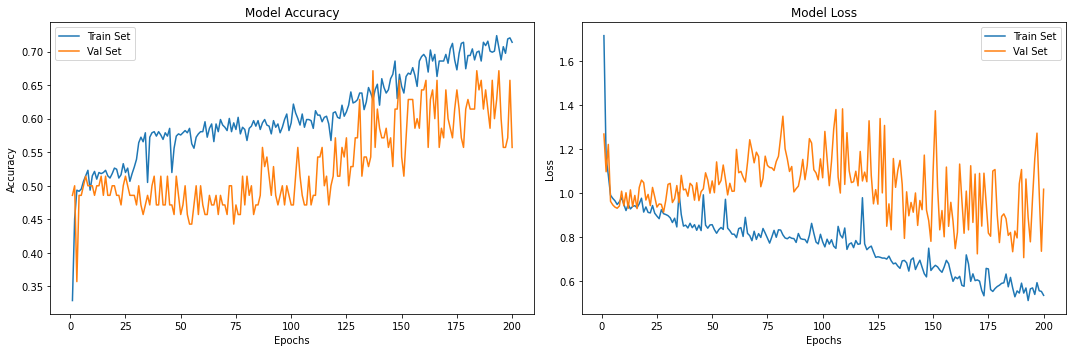

In [23]:
# Plot model performance
acc = cnn.history['accuracy']
val_acc = cnn.history['val_accuracy']
loss = cnn.history['loss']
val_loss = cnn.history['val_loss']
epochs_range = range(1, len(cnn.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

In [24]:
base_model = VGG16(
    weights='imagenet',
    include_top=False, 
    input_shape=(350,350,3)
)

In [25]:
NUM_CLASSES = 4

vgg_model = Sequential()
vgg_model.add(base_model)
vgg_model.add(layers.Flatten())
vgg_model.add(layers.Dropout(0.25))
vgg_model.add(layers.Dense(NUM_CLASSES, activation='sigmoid'))

vgg_model.layers[0].trainable = False

vgg_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

vgg_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 10, 10, 512)       14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 51200)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 204804    
Total params: 14,919,492
Trainable params: 204,804
Non-trainable params: 14,714,688
_________________________________________________________________


In [26]:
# Adding Model check point Callback

mc = ModelCheckpoint(
    filepath="./ct_vgg_best_model.hdf5",
    monitor= 'val_accuracy', 
    verbose= 1,
    save_best_only= True, 
    mode = 'auto'
    );

call_back = [ mc];

In [27]:
# Fitting the Model
vgg = vgg_model.fit(
    train_data, 
    steps_per_epoch = train_data.samples//train_data.batch_size, 
    epochs = 200, 
    validation_data = val_data, 
    validation_steps = val_data.samples//val_data.batch_size,
    callbacks = call_back 
    )

Epoch 1/200
122/122 [==============================] - ETA: 0s - loss: 1.3757 - accuracy: 0.3141
Epoch 00001: val_accuracy improved from -inf to 0.31429, saving model to .\ct_vgg_best_model.hdf5
122/122 [==============================] - 92s 753ms/step - loss: 1.3757 - accuracy: 0.3141 - val_loss: 1.3830 - val_accuracy: 0.3143
Epoch 2/200
122/122 [==============================] - ETA: 0s - loss: 1.3865 - accuracy: 0.3191
Epoch 00002: val_accuracy improved from 0.31429 to 0.32857, saving model to .\ct_vgg_best_model.hdf5
122/122 [==============================] - 91s 747ms/step - loss: 1.3865 - accuracy: 0.3191 - val_loss: 1.3781 - val_accuracy: 0.3286
Epoch 3/200
122/122 [==============================] - ETA: 0s - loss: 1.4245 - accuracy: 0.3191
Epoch 00003: val_accuracy did not improve from 0.32857
122/122 [==============================] - 87s 713ms/step - loss: 1.4245 - accuracy: 0.3191 - val_loss: 1.3316 - val_accuracy: 0.3143
Epoch 4/200
122/122 [==============================] 

KeyboardInterrupt: 

In [76]:
!nvidia-smi

Mon May  2 02:59:37 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 497.33       Driver Version: 497.33       CUDA Version: 11.5     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   49C    P8     8W /  N/A |    134MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [23]:
# Loading the Best Fit Model 
model = load_model("./ct_vgg_best_model.hdf5")

In [24]:
# Checking the Accuracy of the Model 
accuracy_vgg = model.evaluate_generator(generator= test_data)[1] 
print(f"The accuracy of the model is = {accuracy_vgg*100} %")

The accuracy of the model is = 53.65079641342163 %


In [25]:
vgg.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [28]:
# Plot model performance
acc = vgg.history['accuracy']
val_acc = vgg.history['val_accuracy']
loss = vgg.history['loss']
val_loss = vgg.history['val_loss']
epochs_range = range(1, len(vgg.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

NameError: name 'vgg' is not defined

In [29]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

base_model = InceptionV3(input_shape = (350, 350, 3), 
                         include_top = False, 
                         weights = 'imagenet')

In [30]:
for layer in base_model.layers:
    layer.trainable = False

In [31]:
x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)

# Add a final sigmoid layer with 4 node for classification output
x = layers.Dense(4, activation='sigmoid')(x)

model_incep = tf.keras.models.Model(base_model.input, x)

model_incep.compile(optimizer = tensorflow.keras.optimizers.RMSprop(learning_rate=0.0001), 
                    loss = 'categorical_crossentropy', 
                    metrics = ['accuracy'])

In [32]:
# Adding Model check point Callback

mc = ModelCheckpoint(
    filepath="./ct_incep_best_model.hdf5",
    monitor= 'val_accuracy', 
    verbose= 1,
    save_best_only= True, 
    mode = 'auto'
    );

call_back = [mc];

In [34]:
# Fitting the Model
incep = model_incep.fit(
    train_data, 
    steps_per_epoch = train_data.samples//train_data.batch_size, 
    epochs = 300, 
    validation_data = val_data, 
    validation_steps = val_data.samples//val_data.batch_size,
    callbacks = call_back 
    )

Epoch 1/300
122/122 [==============================] - ETA: 0s - loss: 6.4005 - accuracy: 0.1875
Epoch 00001: val_accuracy improved from -inf to 0.18571, saving model to .\ct_incep_best_model.hdf5
122/122 [==============================] - 146s 1s/step - loss: 6.4005 - accuracy: 0.1875 - val_loss: 9.9481 - val_accuracy: 0.1857
Epoch 2/300
122/122 [==============================] - ETA: 0s - loss: 7.9971 - accuracy: 0.2352
Epoch 00002: val_accuracy improved from 0.18571 to 0.32857, saving model to .\ct_incep_best_model.hdf5
122/122 [==============================] - 151s 1s/step - loss: 7.9971 - accuracy: 0.2352 - val_loss: 5.8074 - val_accuracy: 0.3286
Epoch 3/300
122/122 [==============================] - ETA: 0s - loss: 7.6120 - accuracy: 0.2434
Epoch 00003: val_accuracy did not improve from 0.32857
122/122 [==============================] - 145s 1s/step - loss: 7.6120 - accuracy: 0.2434 - val_loss: 9.9481 - val_accuracy: 0.1857
Epoch 4/300
 95/122 [======================>.......] - 

KeyboardInterrupt: 

In [32]:
# Loading the Best Fit Model 
model = load_model("./ct_incep_best_model.hdf5")

In [33]:
# Checking the Accuracy of the Model 
accuracy_incep = model.evaluate_generator(generator= test_data)[1] 
print(f"The accuracy of the model is = {accuracy_incep*100} %")

The accuracy of the model is = 53.96825671195984 %


In [34]:
incep.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

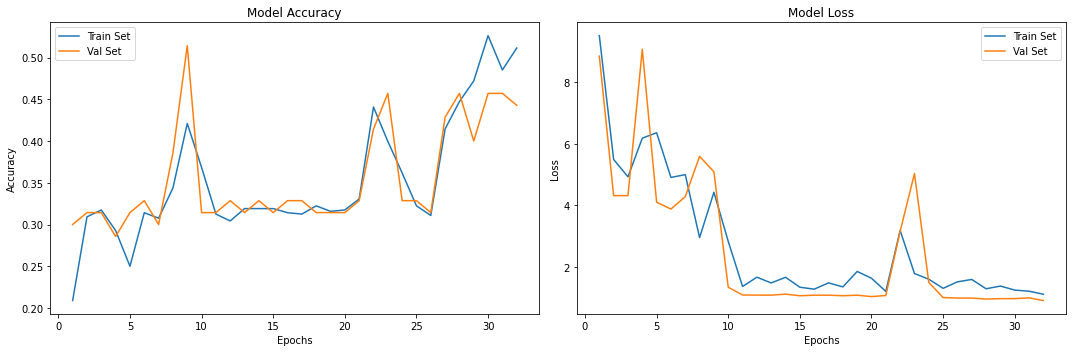

In [35]:
# Plot model performance
acc = incep.history['accuracy']
val_acc = incep.history['val_accuracy']
loss = incep.history['loss']
val_loss = incep.history['val_loss']
epochs_range = range(1, len(incep.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

In [36]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(input_shape=(350, 350,3),
                      include_top=False, weights="imagenet", 
                      pooling='max')

In [37]:
for layer in base_model.layers:
    layer.trainable = False

In [38]:
model_resnet = Sequential()
model_resnet.add(base_model)
model_resnet.add(Dense(4, activation='sigmoid'))

In [39]:
model_resnet.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001), 
                     loss = 'categorical_crossentropy', 
                     metrics = ['accuracy'])

In [40]:
# Adding Model check point Callback

mc = ModelCheckpoint(
    filepath="./ct_resnet_best_model.hdf5",
    monitor= 'val_accuracy', 
    verbose= 1,
    save_best_only= True, 
    mode = 'auto'
    );

call_back = [mc];

In [41]:
resnet = model_incep.fit(
    train_data, 
    steps_per_epoch = train_data.samples//train_data.batch_size, 
    epochs = 32, 
    validation_data = val_data, 
    validation_steps = val_data.samples//val_data.batch_size,
    callbacks = call_back 
    )

Epoch 1/32
122/122 [==============================] - ETA: 0s - loss: nan - accuracy: 0.3849
Epoch 00001: val_accuracy improved from -inf to 0.32857, saving model to .\ct_resnet_best_model.hdf5
122/122 [==============================] - 168s 1s/step - loss: nan - accuracy: 0.3849 - val_loss: nan - val_accuracy: 0.3286
Epoch 2/32
122/122 [==============================] - ETA: 0s - loss: nan - accuracy: 0.3158
Epoch 00002: val_accuracy did not improve from 0.32857
122/122 [==============================] - 162s 1s/step - loss: nan - accuracy: 0.3158 - val_loss: nan - val_accuracy: 0.3143
Epoch 3/32
122/122 [==============================] - ETA: 0s - loss: nan - accuracy: 0.3191
Epoch 00003: val_accuracy did not improve from 0.32857
122/122 [==============================] - 161s 1s/step - loss: nan - accuracy: 0.3191 - val_loss: nan - val_accuracy: 0.3143
Epoch 4/32
122/122 [==============================] - ETA: 0s - loss: nan - accuracy: 0.3191 
Epoch 00004: val_accuracy did not impr

KeyboardInterrupt: 

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
model_resnet = Sequential()
model_resnet.add(base_model)
model_resnet.add(Dense(4, activation='sigmoid'))

In [ ]:
def chestScanPrediction(path, _model):
    classes_dir = ["Adenocarcinoma","Large cell carcinoma","Normal","Squamous cell carcinoma"]
    # Loading Image
    img = image.load_img(path, target_size=(350,350))
    # Normalizing Image
    norm_img = image.img_to_array(img)/255
    # Converting Image to Numpy Array
    input_arr_img = np.array([norm_img])
    # Getting Predictions
    pred = np.argmax(_model.predict(input_arr_img))
    # Printing Model Prediction
    print(classes_dir[pred])

In [ ]:
path = "../mycode/Data/test/large.cell.carcinoma/000110.png"
chestScanPrediction(path,model_incep)